In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
class MeanShift:
    def __init__(self, bandwidth=2):
        self.bandwidth = bandwidth

    def fit(self, X):
        centroids = X.copy()

        for _ in range(5):  # Проводим 5 итераций
            for i, x in enumerate(X):
                distances = np.linalg.norm(centroids - x, axis=1)
                in_window = distances < self.bandwidth
                in_points = X[in_window]
                new_centroid = np.mean(in_points, axis=0)
                centroids[i] = new_centroid

        self.centroids = centroids

    def predict(self, X):
        labels = np.zeros(len(X))

        for i, x in enumerate(X):
            distances = np.linalg.norm(self.centroids - x, axis=1)
            labels[i] = np.argmin(distances)

        return labels

In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
data = pd.read_csv(url)

X = data.iloc[:, :4].values

In [4]:
ms = MeanShift(bandwidth=2)
ms.fit(X)

In [5]:
labels = ms.predict(X)

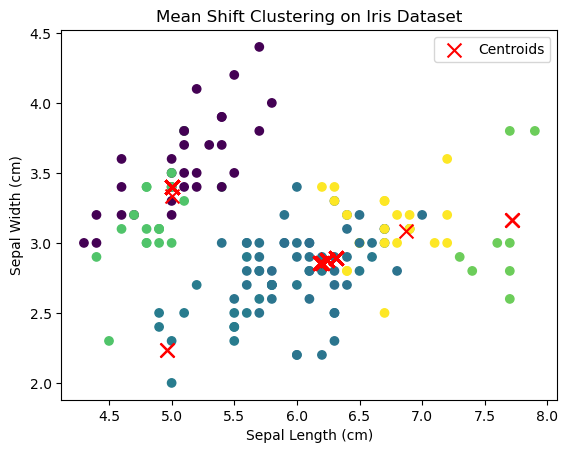

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(ms.centroids[:, 0], ms.centroids[:, 1], color='red', marker='x', s=100, label='Centroids')
plt.title('Mean Shift Clustering on Iris Dataset')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.legend()
plt.show()